# Tarea 4: Introducción al análisis y procesamiento de audio con python

## Dominio del tiempo:

A continuación, se detallarán los pasos donde se crean dos tipos de audio (estéreo y mono) y con ellos se realiza la 
gráfica en el dominio del tiempo.

In [1]:
# Importamos cada una de las librerias que necesitamos para realizar la tarea.
from scipy.io import wavfile
import IPython
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Aquí definimos los directorios donde guardaremos los audios con los que vamos a trabajar.
cwd = os.getcwd()
audio_input_path = os.path.join(cwd, os.path.join('audio', '_input'))
audio_output_path = os.path.join(cwd, os.path.join('audio', '_output'))
print(f'Directorio con los audios de entrada: {audio_input_path}')
print(f'Directorio donde guardaremos los audios generados: {audio_output_path}\n')

Directorio con los audios de entrada: /home/adrianlancho/Documentos/Repositorio1/audio/_input
Directorio donde guardaremos los audios generados: /home/adrianlancho/Documentos/Repositorio1/audio/_output



In [3]:
# Cargamos el archivo de audio .wav en este caso.
filename = os.path.join(audio_input_path, 'breaking_bad.wav')

sample_rate_1, audio_data = wavfile.read(filename)
print(f'Frecuencia de muestreo (sample rate_1): {sample_rate_1/1000} kHz')

Frecuencia de muestreo (sample rate_1): 44.1 kHz


In [4]:
# Convertimos a mono mediante la media por canal (simplificacion) y mostramos las características del audio mono.
new_data_mono = audio_data.mean(axis=1)
print('Nuevos datos de audio (mono):')
print(f'- Nuevo tamaño: {new_data_mono.shape}')
print(f'- Canal unico:  {new_data_mono[:5]}...')

# Mantenemos la misma resolucion que antes.
new_data_mono = new_data_mono.astype(np.int16)
print(f'- Resolucion:   {type(new_data_mono[0])}\n')

Nuevos datos de audio (mono):
- Nuevo tamaño: (653748,)
- Canal unico:  [-4442.5  2968.5  3686.   3109.5  6231.5]...
- Resolucion:   <class 'numpy.int16'>



In [5]:
# Guardamos el archivo mono a un fichero de tipo wav.
wavfile.write(
    filename=os.path.join(audio_output_path, 'breaking_bad_mono.wav'),
    rate=sample_rate_1,
    data=new_data_mono
)

In [6]:
# En este punto, mostramos el número de muestras del audio estéreo y mono que se van a coger para realizar la grafica en el dominio del tiempo. 
ampl_values_1 = len(audio_data)
ampl_values_2 = len(new_data_mono)
print(f'Número de muestras del audio estereo (valores de amplitud): {ampl_values_1}')
print(f'Número de muestras del audio mono (valores de amplitud): {ampl_values_2}')

Número de muestras del audio estereo (valores de amplitud): 653748
Número de muestras del audio mono (valores de amplitud): 653748


In [7]:
# A continuación, se construye un array que representa el eje 'X' del tiempo en la 
# grabación de audio, para ello se utiliza la función numpy.arange(). 
t1 = np.arange(0, ampl_values_1/sample_rate_1, 1/sample_rate_1)
t2 = np.arange(0, ampl_values_2/sample_rate_1, 1/sample_rate_1)

In [8]:
# Se imprimen los valores de los arrays t1 y t2, que contienen los instantes de tiempo en los que se tomaron las muestras de la señal de audio.
print(t1)
print(t2)

[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.48241497e+01
 1.48241723e+01 1.48241950e+01]
[0.00000000e+00 2.26757370e-05 4.53514739e-05 ... 1.48241497e+01
 1.48241723e+01 1.48241950e+01]


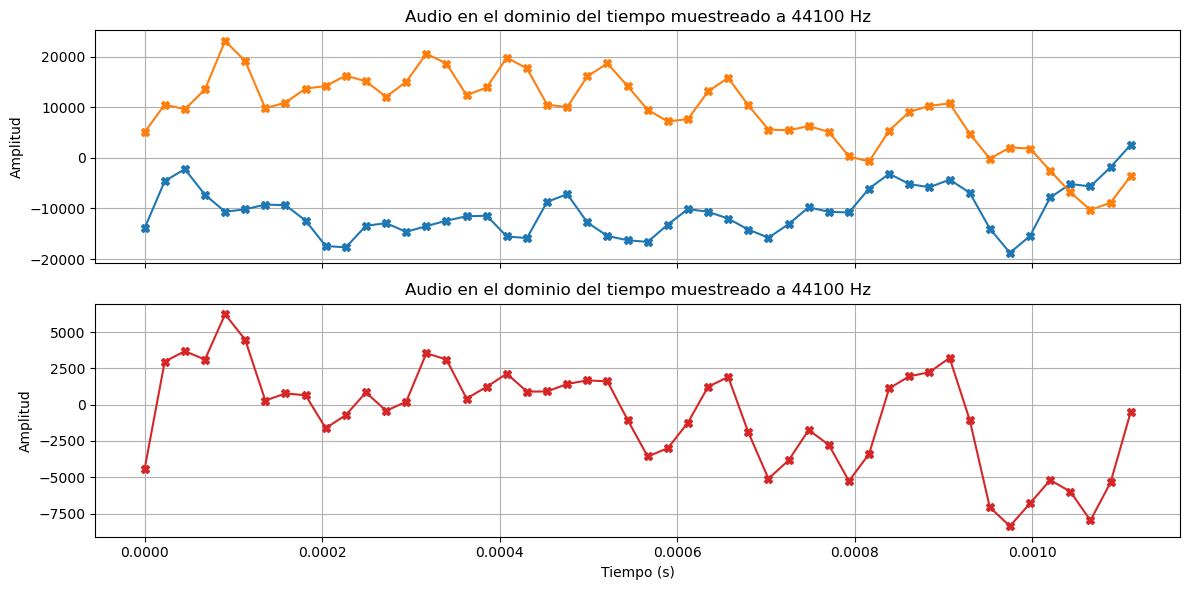

In [9]:
# Por último, se crea una figura con dos gráficos que muestran la señal de audio en el dominio del tiempo para dos tasas de muestreo diferentes.
fig, ax = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Solo mostramos las primeras 50 muestras de amplitud (por claridad).
end = 50

# Señal a 48 kHz.
ax[0].plot(t1[:end], audio_data[:end], marker='X')
ax[0].set_title(f'Audio en el dominio del tiempo muestreado a {sample_rate_1} Hz')
ax[0].set_ylabel('Amplitud')
ax[0].grid(True)

# Señal a 24 kHz.
# Utilizamos ratio para ajustar el eje x de ambas gráficas
# ya que la fs es menor en esta señal.
ratio = sample_rate_1 / sample_rate_1 
ax[1].plot(t2[:int(end/ratio)], new_data_mono[:int(end/ratio)], c='tab:red', marker='X')
ax[1].set_title(f'Audio en el dominio del tiempo muestreado a {sample_rate_1} Hz')
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Amplitud')
ax[1].grid(True)

# Mostramos la figura.
plt.tight_layout()
plt.show()

## Dominio de la frecuencia: Transformada de Fourier (FFT):

La "Transformación rápida de Fourier" (FFT para abreviar) descompone una señal en sus componentes espectrales individuales, proporcionando información sobre su composición. En resumen, la Transformada de Fourier convierte la señal del dominio del tiempo (amplitud vs tiempo) al dominio de la frecuencia (amplitud vs frecuencia). Esto nos permite ver qué frecuencias están presentes en el audio y con qué intensidad.


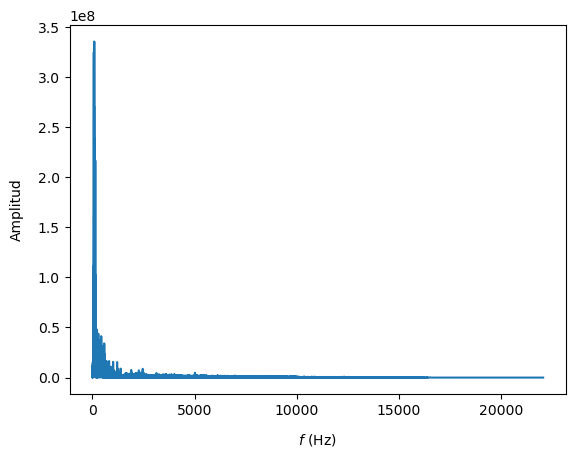

In [12]:
# La longitud del array de datos y el
# sample rate (frecuencia de muestreo).
n = len(new_data_mono)
Fs = sample_rate_1

# Working with stereo audio, there are two channels in the audio data.
# Let's retrieve each channel seperately:
# ch1 = np.array([data[i][0] for i in range(n)]) #channel 1
# ch2 = np.array([data[i][1] for i in range(n)]) #channel 2
# We can then perform a Fourier analysis on the first
# channel to see what the spectrum looks like.

# Calculando la Transformada Rapida de Fourier (FFT) en audio mono.
ch_Fourier = np.fft.fft(new_data_mono)  # ch1

# Solo miramos frecuencia por debajo de Fs/2
# (Nyquist-Shannon) --> Spectrum.
abs_ch_Fourier = np.absolute(ch_Fourier[:n//2])

# Graficamos.
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud', labelpad=10)
plt.xlabel('$f$ (Hz)', labelpad=10)
plt.show()


Como se puede observar en la gráfica anterior, la señal es de baja frecuencia, lo que es típico en grabaciones de voz o ciertos tipos de sonidos ambientales.

## Energia del espectrograma y frecuencia de corte:

Epsilon: 1e-05
Valor de corte para la energia del espectro: 259238873478.8913
Mascara: [False False False ...  True  True  True]
Frecuencia de corte f0 (Hz): 22012


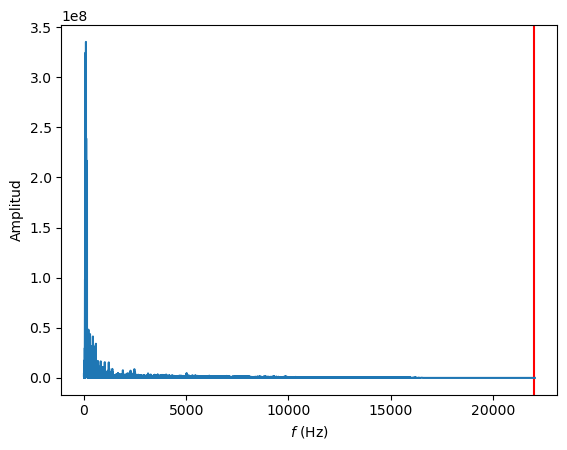

In [13]:
# Definimos diferentes epsilons: la parte de
# la energia del espectro que NO conservamos.
eps = [1e-5, .02, .041, .063, .086, .101, .123]

# Jugamos con los valores de epsilon (ID VARIANDO ESTE VALOR Y MIRAD LA GRÁFICA).
eps = eps[0]
print(f'Epsilon: {eps}')

# Calculamos el valor de corte para esta energia.
thr_spec_energy = (1 - eps) * np.sum(abs_ch_Fourier)
print(f'Valor de corte para la energia del espectro: {thr_spec_energy}')

# Integral de la frecuencia --> energia del espectro.
spec_energy = np.cumsum(abs_ch_Fourier)

# Mascara (array booleano) que compara el
# valor de corte con la energia del espectro.
frequencies_to_remove = thr_spec_energy < spec_energy  
print(f'Mascara: {frequencies_to_remove}')

# La frecuencia f0 por la que cortamos el espectro.
f0 = (len(frequencies_to_remove) - np.sum(frequencies_to_remove)) * (Fs/2) / (n//2)
print(f'Frecuencia de corte f0 (Hz): {int(f0)}')

# Graficamos.
plt.axvline(f0, color='r')
plt.plot(np.linspace(0, Fs/2, n//2), abs_ch_Fourier)
plt.ylabel('Amplitud')
plt.xlabel('$f$ (Hz)')
plt.show()



- Se ha calculado la energía del espectograma, obteniendo un valor muy alto, lo que indica que la señal
  tiene una gran cantidad de información distribuida en su espectro.

- El resultado muestra que casi toda la energía de la señak está cintenida en el rango audible (hasta 22012 Hz).


## Compresión del archivo:

In [16]:
# Calculamos el factor D de downsampling.
D = int(Fs / f0)
print(f'Factor de downsampling: {D}')

# Obtenemos los nuevos datos (slicing with stride).
new_data = new_data_mono[::D]

# Definimos el nombre del audio comprimido generado.
wav_compressed_file = "archivo_comprimido.wav"

# Escribimos los datos a un archivo de tipo wav.
wavfile.write(
    filename=os.path.join(audio_output_path, wav_compressed_file),
    rate=int(Fs/D),
    data=new_data
)

# Cargamos el nuevo archivo.
new_sample_rate, new_audio_data = wavfile.read(filename=os.path.join(audio_output_path, wav_compressed_file))

Factor de downsampling: 2


In [17]:
# En este caso, mostramos el audio comprimido.
IPython.display.Audio(new_audio_data, rate=new_sample_rate)

## Espectograma de ambas ondas: Original y comrpimido

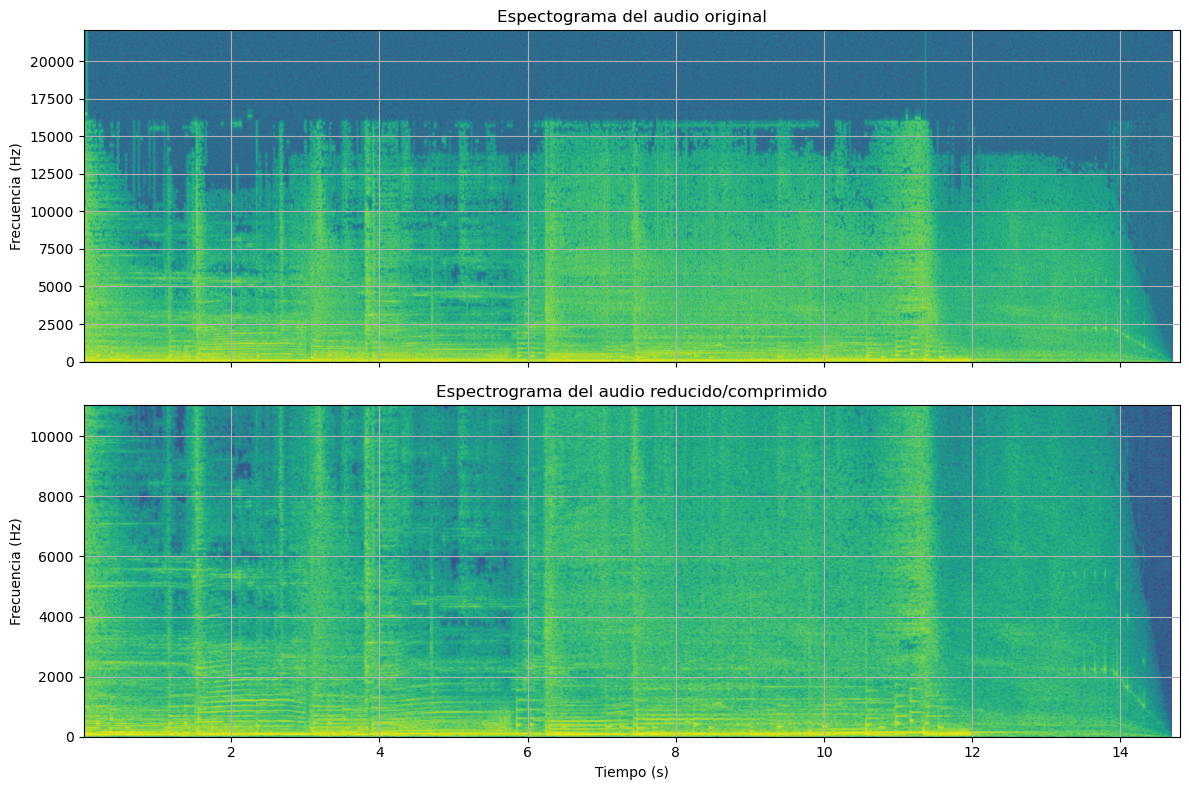

In [19]:
fig, ax = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

Pxx, freqs, bins, im = ax[0].specgram(new_data_mono, NFFT=1024, Fs=sample_rate_1, noverlap=512)
ax[0].set_title('Espectograma del audio original')
ax[0].set_ylabel('Frecuencia (Hz)')
ax[0].grid(True)

Pxx, freqs, bins, im = ax[1].specgram(new_audio_data, NFFT=1024, Fs=new_sample_rate, noverlap=512)
ax[1].set_title('Espectrograma del audio reducido/comprimido')
ax[1].set_xlabel('Tiempo (s)')
ax[1].set_ylabel('Frecuencia (Hz)')
ax[1].grid(True)

plt.tight_layout()
plt.show()

Respecto a los espectogramas anteriores, podemos que:

- En el espectograma del audio original, se observa una mayor densidad de información en las frecuencias más bajas y medias.

- En el espectograma del audio comprimido, se observa que el rango de frecuencias ha sido reducido, eliminando información en las frecuencias 
  más altas. Esto es útil en aplicaciones de procesamiento de audio donde se busca reducir el tamaño del archivo sin perder calidad perceptible.

In [20]:
# En este punto se muestran las diferencias de tamaño entre el archivo original y el archivo comprimido.
!ls -sh audio/_input/breaking_bad.wav
!ls -sh audio/_output/archivo_comprimido.wav

2,5M audio/_input/breaking_bad.wav
640K audio/_output/archivo_comprimido.wav


In [21]:
# En este caso, mostramos el audio comprimido.
IPython.display.Audio(new_audio_data, rate=new_sample_rate)


In [22]:
# Y en este caso, mostramos el audio original.
IPython.display.Audio(new_data_mono, rate=sample_rate_1)